# create figures for HOT1A3 DE long term 

In [29]:
library(DESeq2)
library(RColorBrewer)
library(reshape2)
library("gplots")
library("GGally")                      # Load GGally package
library(goseq)
library(readxl)
library(tidyverse)
library("pheatmap")
library(corrplot)
library(circlize)

In [30]:
library(ggrastr)

Warning message:
"package 'ggrastr' was built under R version 4.2.3"


In [31]:
library(ggrepel)

In [32]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 300)

In [33]:
source('../src/common_functions.R')

In [34]:
df_all_orig = read_csv(file.path('DE_results', 'HOT1A3_all_FC_results.csv'))



Warning message:
"One or more parsing issues, call `problems()` on your data frame for details, e.g.:
  dat <- vroom(...)
  problems(dat)"
Rows: 97675 Columns: 36
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (25): contrast, protein_id, Assay, contrast1, seq_id, Name, gene, gene_s...
dbl  (7): logFC, AveExpr, pvalue, padj, start, end, gene_length
lgl  (4): exception, down, up, is_de

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [35]:
df_all_orig

contrast,protein_id,logFC,AveExpr,pvalue,padj,Assay,contrast1,seq_id,Name,⋯,path,ecpath,Category,Membrane.transport,kegg_gene1,kegg_gene2,gene_id,down,up,is_de
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>
C2 - C1,WP_020744244.1,1.5362447,0.8062054,4.418240e-08,9.826165e-05,Proteome,C2vsC1_prot,NZ_CP012202.1,ACZ81_RS16015,⋯,"00280 Valine, leucine and isoleucine degradation [PATH:ko00280];00410 beta-Alanine metabolism [PATH:ko00410];00562 Inositol phosphate metabolism [PATH:ko00562];00640 Propanoate metabolism [PATH:ko00640]","K00140 mmsA, iolA, ALDH6A1; malonate-semialdehyde dehydrogenase (acetylating) / methylmalonate-semialdehyde dehydrogenase [EC:1.2.1.18 1.2.1.27]",AA/Nucleotide;Energy/Carbohydrate/Glycan,NA,"mmsA, iolA, ALDH6A1","(mmsA,iolA)",ACZ81_RS16015,FALSE,TRUE,TRUE
C2 - C1,WP_061486834.1,1.5648136,0.4518796,1.133719e-07,1.260696e-04,Proteome,C2vsC1_prot,NZ_CP012202.1,ACZ81_RS19455,⋯,NA,NA,Other,NA,NA,NA,ACZ81_RS19455,FALSE,TRUE,TRUE
C2 - C1,WP_061439539.1,1.8519732,-0.9340314,2.173784e-07,1.611498e-04,Proteome,C2vsC1_prot,NZ_CP012202.1,ACZ81_RS03205,⋯,00920 Sulfur metabolism [PATH:ko00920],K20035 dmdC; 3-(methylsulfanyl)propanoyl-CoA dehydrogenase [EC:1.3.99.41],Energy/Carbohydrate/Glycan,NA,nan,nan,ACZ81_RS03205,FALSE,TRUE,TRUE
C2 - C1,WP_061485703.1,1.2073415,-1.0444874,3.978691e-07,2.212152e-04,Proteome,C2vsC1_prot,NZ_CP012202.1,ACZ81_RS08660,⋯,00920 Sulfur metabolism [PATH:ko00920],K20035 dmdC; 3-(methylsulfanyl)propanoyl-CoA dehydrogenase [EC:1.3.99.41],Energy/Carbohydrate/Glycan,NA,nan,nan,ACZ81_RS08660,FALSE,TRUE,TRUE
C2 - C1,WP_014949840.1,-0.7880224,2.6035957,6.292978e-07,2.439240e-04,Proteome,C2vsC1_prot,NZ_CP012202.1,ACZ81_RS11690,⋯,00010 Glycolysis / Gluconeogenesis [PATH:ko00010];00710 Carbon fixation in photosynthetic organisms [PATH:ko00710];04066 HIF-1 signaling pathway [PATH:ko04066];04131 Membrane trafficking [BR:ko04131];04147 Exosome [BR:ko04147],"K00134 GAPDH, gapA; glyceraldehyde 3-phosphate dehydrogenase (phosphorylating) [EC:1.2.1.12]",Energy/Carbohydrate/Glycan,NA,"GAPDH, gapA",(gapA),ACZ81_RS11690,TRUE,FALSE,TRUE
C2 - C1,WP_014949230.1,1.5014521,0.5599381,6.984270e-07,2.439240e-04,Proteome,C2vsC1_prot,NZ_CP012202.1,ACZ81_RS08650,⋯,00071 Fatty acid degradation [PATH:ko00071];00362 Benzoate degradation [PATH:ko00362];00650 Butanoate metabolism [PATH:ko00650],K07516 fadN; 3-hydroxyacyl-CoA dehydrogenase [EC:1.1.1.35],Energy/Carbohydrate/Glycan,NA,fadN,(fadN),ACZ81_RS08650,FALSE,TRUE,TRUE
C2 - C1,WP_061485875.1,1.8006045,-0.3495981,7.735888e-07,2.439240e-04,Proteome,C2vsC1_prot,NZ_CP012202.1,ACZ81_RS09955,⋯,NA,NA,Other,NA,NA,NA,ACZ81_RS09955,FALSE,TRUE,TRUE
C2 - C1,WP_158511557.1,1.8835011,0.7089464,8.774244e-07,2.439240e-04,Proteome,C2vsC1_prot,NZ_CP012202.1,ACZ81_RS17215,⋯,NA,NA,Other,NA,NA,NA,ACZ81_RS17215,FALSE,TRUE,TRUE
C2 - C1,WP_014950543.1,-2.1834545,3.6445136,1.587079e-06,3.921848e-04,Proteome,C2vsC1_prot,NZ_CP012202.1,gltB,⋯,"00250 Alanine, aspartate and glutamate metabolism [PATH:ko00250];00910 Nitrogen metabolism [PATH:ko00910];01002 Peptidases and inhibitors [BR:ko01002]",K00265 gltB; glutamate synthase (NADPH) large chain [EC:1.4.1.13],Nitrogen metabolism,NA,gltB,(gltB),ACZ81_RS15340,TRUE,FALSE,TRUE


In [36]:
# fill in N/A
df_all_orig = df_all_orig %>% mutate(Membrane.transport = replace_na(Membrane.transport, ""))

In [37]:
df_all = df_all_orig %>%
    filter(contrast1 %in% c('LATEvsC1_prot', 'LATEvsC1_rna'))

In [38]:
df_degenes = df_all_orig %>% 
    filter(padj < 0.05)

In [39]:
df_degenes2 = df_all_orig %>% 
    filter(padj < 0.05) %>%
    filter (abs(logFC)>1.5)

In [40]:
df_all %>% count(Category) %>% arrange(desc(n)) 

Category,n
<chr>,<int>
Other,1849
Uncharacterized,924
Genetic Info,883
Membrane transport,539
Metabolism,535
AA/Nucleotide,483
Energy/Carbohydrate/Glycan,420
Env. Info/Cellular Process,276
Motility,182


In [41]:
unique(df_all$contrast1)

[1] "LATEvsC1_prot" "LATEvsC1_rna"

In [42]:
t(head(df_all))

contrast,Clongterm - C1,Clongterm - C1,Clongterm - C1,Clongterm - C1,Clongterm - C1,Clongterm - C1
protein_id,WP_158511557.1,WP_081106121.1,WP_061486834.1,WP_014951136.1,WP_061485862.1,WP_061486630.1
logFC,4.648436,3.256724,3.472784,6.620295,3.807902,-2.345990
AveExpr,0.7089464,-1.9976280,0.4518796,-1.6227350,-1.6259760,2.9371622
pvalue,1.912012e-13,1.547978e-12,1.566757e-12,3.714081e-12,7.879154e-12,8.049071e-12
padj,4.252314e-10,1.161489e-09,1.161489e-09,2.065029e-09,2.983522e-09,2.983522e-09
Assay,Proteome,Proteome,Proteome,Proteome,Proteome,Proteome
contrast1,LATEvsC1_prot,LATEvsC1_prot,LATEvsC1_prot,LATEvsC1_prot,LATEvsC1_prot,LATEvsC1_prot
seq_id,NZ_CP012202.1,NZ_CP012202.1,NZ_CP012202.1,NZ_CP012202.1,NZ_CP012202.1,NZ_CP012202.1
Name,ACZ81_RS17215,ACZ81_RS18510,ACZ81_RS19455,ACZ81_RS18535,ACZ81_RS09835,ACZ81_RS17170
gene,NA,NA,NA,NA,NA,NA


In [43]:
# number of differentiall expressed genes
df_all %>%
    filter(padj < 0.05) %>% count(Assay, down)

Assay,down,n
<chr>,<lgl>,<int>
Proteome,FALSE,541
Proteome,TRUE,556
RNA,FALSE,605
RNA,TRUE,758


# Top up and down regulated genes

In [44]:
df_all %>%
    filter(padj < 0.05) %>% top_n(50, logFC) %>% 
    select(Assay,logFC,gene, product, Category, gene_length/3) #%>% 
    #select(Assay,logFC,gene)

Assay,logFC,gene,product,Category,gene_length
<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
Proteome,4.648436,NA,DUF11 domain-containing protein,Other,4538
Proteome,3.472784,NA,C1 family peptidase,Other,1778
Proteome,6.620295,NA,TonB-dependent receptor,Membrane transport,2408
Proteome,3.807902,NA,TonB-dependent receptor,Membrane transport,3059
Proteome,4.223013,"(sdaA,sdaB,tdcG)",L-serine ammonia-lyase,AA/Nucleotide,1373
Proteome,3.764533,"(xylS,yicI)",alpha-xylosidase,Metabolism,2066
Proteome,3.465726,NA,TonB-dependent receptor,Membrane transport,2861
Proteome,3.897963,(glyA),serine hydroxymethyltransferase,AA/Nucleotide;Energy/Carbohydrate/Glycan,1256
Proteome,3.374259,NA,TonB-dependent receptor,Other,2906


In [45]:
df_all %>%
    filter(padj < 0.05, Category=='Metabolism') %>% top_n(-20, logFC) %>% 
    select(Assay,logFC,gene, product, Category, path) #%>% 
    #select(Assay,logFC,gene)

Assay,logFC,gene,product,Category,path
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
Proteome,-2.242937,metF,methylenetetrahydrofolate reductase,Metabolism,00670 One carbon pool by folate [PATH:ko00670];00720 Carbon fixation pathways in prokaryotes [PATH:ko00720]
Proteome,-2.126771,fabF,beta-ketoacyl-ACP synthase II,Metabolism,00061 Fatty acid biosynthesis [PATH:ko00061];00780 Biotin metabolism [PATH:ko00780];01004 Lipid biosynthesis proteins [BR:ko01004]
Proteome,-1.923141,(pntB),NAD(P)(+) transhydrogenase (Re/Si-specific) subunit beta,Metabolism,00760 Nicotinate and nicotinamide metabolism [PATH:ko00760]
Proteome,-3.021713,(plsC),1-acylglycerol-3-phosphate O-acyltransferase,Metabolism,00561 Glycerolipid metabolism [PATH:ko00561];00564 Glycerophospholipid metabolism [PATH:ko00564];01004 Lipid biosynthesis proteins [BR:ko01004]
Proteome,-2.572302,folE2,GTP cyclohydrolase FolE2,Metabolism,00790 Folate biosynthesis [PATH:ko00790]
Proteome,-2.006756,(coaX),type III pantothenate kinase,Metabolism,00770 Pantothenate and CoA biosynthesis [PATH:ko00770]
RNA,-2.182673,NA,di-heme enzyme,Metabolism,99980 Enzymes with EC numbers
RNA,-2.647281,(fabH),ketoacyl-ACP synthase III,Metabolism,00061 Fatty acid biosynthesis [PATH:ko00061];01004 Lipid biosynthesis proteins [BR:ko01004]
RNA,-2.096104,(acpP),acyl carrier protein,Metabolism,00061 Fatty acid biosynthesis [PATH:ko00061];00998 Biosynthesis of various antibiotics [PATH:ko00998]


In [46]:
get_top_gene_id <- function(df_all, assay, top_number) {
    df_all %>%
        filter(padj < 0.05) %>% 
        filter(Assay == assay) %>% 
        top_n(top_number, logFC) %>% 
        select(gene_id, Assay)
}
number_of_top_ids = 5
top_up_de_genes = bind_rows(list(get_top_gene_id(df_all, 'Proteome', number_of_top_ids), get_top_gene_id(df_all, 'RNA', number_of_top_ids)))
top_down_de_genes = bind_rows(list(get_top_gene_id(df_all, 'Proteome', -number_of_top_ids), get_top_gene_id(df_all, 'RNA', -number_of_top_ids)))


In [47]:
dput(names(df_all))

c("contrast", "protein_id", "logFC", "AveExpr", "pvalue", "padj", 
"Assay", "contrast1", "seq_id", "Name", "gene", "gene_synonym", 
"locus_tag", "old_locus_tag", "source", "start", "end", "strand", 
"Note", "exception", "inference", "product", "gene_length", "path_id", 
"main", "sub", "path", "ecpath", "Category", "Membrane.transport", 
"kegg_gene1", "kegg_gene2", "gene_id", "down", "up", "is_de")


In [48]:
df_pivot_for_top = df_all %>%
    pivot_wider(
        names_from = 'Assay',
        values_from = c("logFC", #"AveExpr", "pvalue",
                        "padj", ),
        id_cols=c("gene_id",  "gene",  "product",  "sub", 
                  #"module",
                  "path"
                  #"pathway",
                 # "ecpath"
                 )
    ) %>% select(gene_id, gene, product, sub, path, logFC_Proteome, padj_Proteome,logFC_RNA,padj_RNA)


In [49]:
dput(names(df_pivot_for_top))

c("gene_id", "gene", "product", "sub", "path", "logFC_Proteome", 
"padj_Proteome", "logFC_RNA", "padj_RNA")


In [50]:
df_pivot_for_top %>% filter(gene_id %in% top_up_de_genes$gene_id) %>% arrange(desc(logFC_RNA), desc(logFC_Proteome) )

gene_id,gene,product,sub,path,logFC_Proteome,padj_Proteome,logFC_RNA,padj_RNA
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ACZ81_RS14330,NA,retroviral-like aspartic protease family protein,NA,NA,NA,NA,7.6477850,7.468601e-08
ACZ81_RS16600,rutC,pyrimidine utilization protein C,09104 Nucleotide metabolism,00240 Pyrimidine metabolism [PATH:ko00240],-0.5607169,3.858014e-01,6.3644086,5.772012e-11
ACZ81_RS16590,(rutE),malonic semialdehyde reductase,09104 Nucleotide metabolism,00240 Pyrimidine metabolism [PATH:ko00240],0.3541390,6.394883e-01,5.8191261,2.122169e-10
ACZ81_RS12900,(lctP),L-lactate permease,09183 Protein families: signaling and cellular processes,02000 Transporters [BR:ko02000],1.2790626,3.646447e-04,5.7077895,8.531193e-68
ACZ81_RS05680,(slyA),MarR family transcriptional regulator,09182 Protein families: genetic information processing,03000 Transcription factors [BR:ko03000],NA,NA,5.3508365,5.665036e-04
ACZ81_RS17215,NA,DUF11 domain-containing protein,NA,NA,4.6484362,4.252314e-10,3.4748874,4.544130e-06
ACZ81_RS18535,NA,TonB-dependent receptor,09183 Protein families: signaling and cellular processes,02000 Transporters [BR:ko02000],6.6202952,2.065029e-09,1.1802726,3.781771e-02
ACZ81_RS09835,NA,TonB-dependent receptor,09183 Protein families: signaling and cellular processes,02000 Transporters [BR:ko02000],3.8079020,2.983522e-09,1.0149269,1.133499e-01
ACZ81_RS10115,"(sdaA,sdaB,tdcG)",L-serine ammonia-lyase,09105 Amino acid metabolism,"00260 Glycine, serine and threonine metabolism [PATH:ko00260];00270 Cysteine and methionine metabolism [PATH:ko00270]",4.2230129,7.930575e-09,0.8610633,2.233841e-02


In [51]:
df_pivot_for_top %>% filter(gene_id %in% top_down_de_genes$gene_id)%>% arrange(logFC_RNA, logFC_Proteome) 

gene_id,gene,product,sub,path,logFC_Proteome,padj_Proteome,logFC_RNA,padj_RNA
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ACZ81_RS07715,NA,MBL fold metallo-hydrolase,NA,NA,0.4179959,6.899768e-01,-5.332020,1.365432e-13
ACZ81_RS03025,NA,hypothetical protein,NA,NA,NA,NA,-5.291441,1.803088e-21
ACZ81_RS11430,NA,DUF1852 domain-containing protein,NA,NA,NA,NA,-5.021441,2.305329e-17
ACZ81_RS05055,"(fliC,hag)",flagellin,09132 Signal transduction;09142 Cell motility;09183 Protein families: signaling and cellular processes,02020 Two-component system [PATH:ko02020];02035 Bacterial motility proteins [BR:ko02035];02040 Flagellar assembly [PATH:ko02040],2.0755205,2.198685e-04,-4.990079,7.891103e-16
ACZ81_RS04970,(flgN),flagellar protein FlgN,09142 Cell motility;09183 Protein families: signaling and cellular processes,02035 Bacterial motility proteins [BR:ko02035];02040 Flagellar assembly [PATH:ko02040],NA,NA,-4.634682,5.110232e-96
ACZ81_RS18760,NA,hypothetical protein,NA,NA,-3.3336306,4.330000e-04,-1.797156,7.386367e-04
ACZ81_RS04240,NA,HlyD family efflux transporter periplasmic adaptor subunit,09193 Unclassified: signaling and cellular processes,99992 Structural proteins,-3.4941622,3.070023e-08,-1.596481,8.011862e-02
ACZ81_RS10345,NA,c-type cytochrome,NA,NA,-3.4208511,8.268003e-09,-1.504945,1.043661e-01
ACZ81_RS21255,NA,hypothetical protein,NA,NA,-4.6268374,3.416598e-07,-1.419179,1.595187e-02


# Vulcano plot

In [52]:
df_degenes2 = df_all %>% 
    filter(padj < 0.05) %>%
    filter (abs(logFC)>2)

In [53]:
df_degenes = df_all %>% 
    filter(padj < 0.05) 

In [54]:
df_degenes %>% count(Assay, Category) %>% pivot_wider(names_from=Assay, values_from = n) %>% arrange(desc(Proteome), desc(RNA) )

Category,Proteome,RNA
<chr>,<int>,<int>
Other,293,396
AA/Nucleotide,131,103
Genetic Info,120,202
Membrane transport,115,113
Energy/Carbohydrate/Glycan,114,67
Metabolism,104,115
Uncharacterized,78,213
Env. Info/Cellular Process,53,68
Motility,47,53


In [55]:
# these are all pseudo genes
df_all %>% filter(is.na(Category)) #%>% count(product)

contrast,protein_id,logFC,AveExpr,pvalue,padj,Assay,contrast1,seq_id,Name,⋯,path,ecpath,Category,Membrane.transport,kegg_gene1,kegg_gene2,gene_id,down,up,is_de
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>
Clongterm - C1,WP_014951296.1,0.5186704,1.497889,3.168492e-02,6.132921e-02,Proteome,LATEvsC1_prot,NZ_CP012202.1,ACZ81_RS19230,⋯,00710 Carbon fixation in photosynthetic organisms [PATH:ko00710],"K00855 PRK, prkB; phosphoribulokinase [EC:2.7.1.19]",NA,,"PRK, prkB",(prkB),ACZ81_RS19230,FALSE,FALSE,FALSE
longtermvsC1,WP_014951296.1,1.4244798,1075.206606,7.704206e-10,2.238686e-08,RNA,LATEvsC1_rna,NZ_CP012202.1,ACZ81_RS19230,⋯,00710 Carbon fixation in photosynthetic organisms [PATH:ko00710],"K00855 PRK, prkB; phosphoribulokinase [EC:2.7.1.19]",NA,,"PRK, prkB",(prkB),ACZ81_RS19230,FALSE,TRUE,TRUE
longtermvsC1,WP_014977839.1,2.2481995,1756.321534,3.311981e-05,2.744017e-04,RNA,LATEvsC1_rna,NZ_CP012202.1,ACZ81_RS19875,⋯,00194 Photosynthesis proteins [BR:ko00194],K02116 atpI; ATP synthase protein I,NA,,atpI,(atpI),ACZ81_RS19875,FALSE,TRUE,TRUE


In [56]:
df_all = df_all %>% filter(!is.na(Category)) #%>% count(product)


In [57]:
df_all$log.padj = -log10(df_all$padj)

In [58]:
df_all$Category = factor(df_all$Category, levels = category.order)


In [59]:
options(repr.plot.width = 4, repr.plot.height = 3, repr.plot.res = 300)

In [60]:
colSums(is.na(df_all))

contrast         protein_id              logFC            AveExpr 
                 0                 58                  0                  0 
            pvalue               padj              Assay          contrast1 
                 5                  5                  0                  0 
            seq_id               Name               gene       gene_synonym 
                58                 58               3344               6230 
         locus_tag      old_locus_tag             source              start 
              4013                175                 58                 58 
               end             strand               Note          exception 
                58                 58               6207               6241 
         inference            product        gene_length            path_id 
                58                 58                 58               2566 
              main                sub               path             ecpath 
              2566               2566               2566               2566 
          Category Membrane.transport         kegg_gene1         kegg_gene2 
                 0                  0               2566               3058 
           gene_id               down                 up              is_de 
                 0                  3                  2                  5 
          log.padj 
                 5

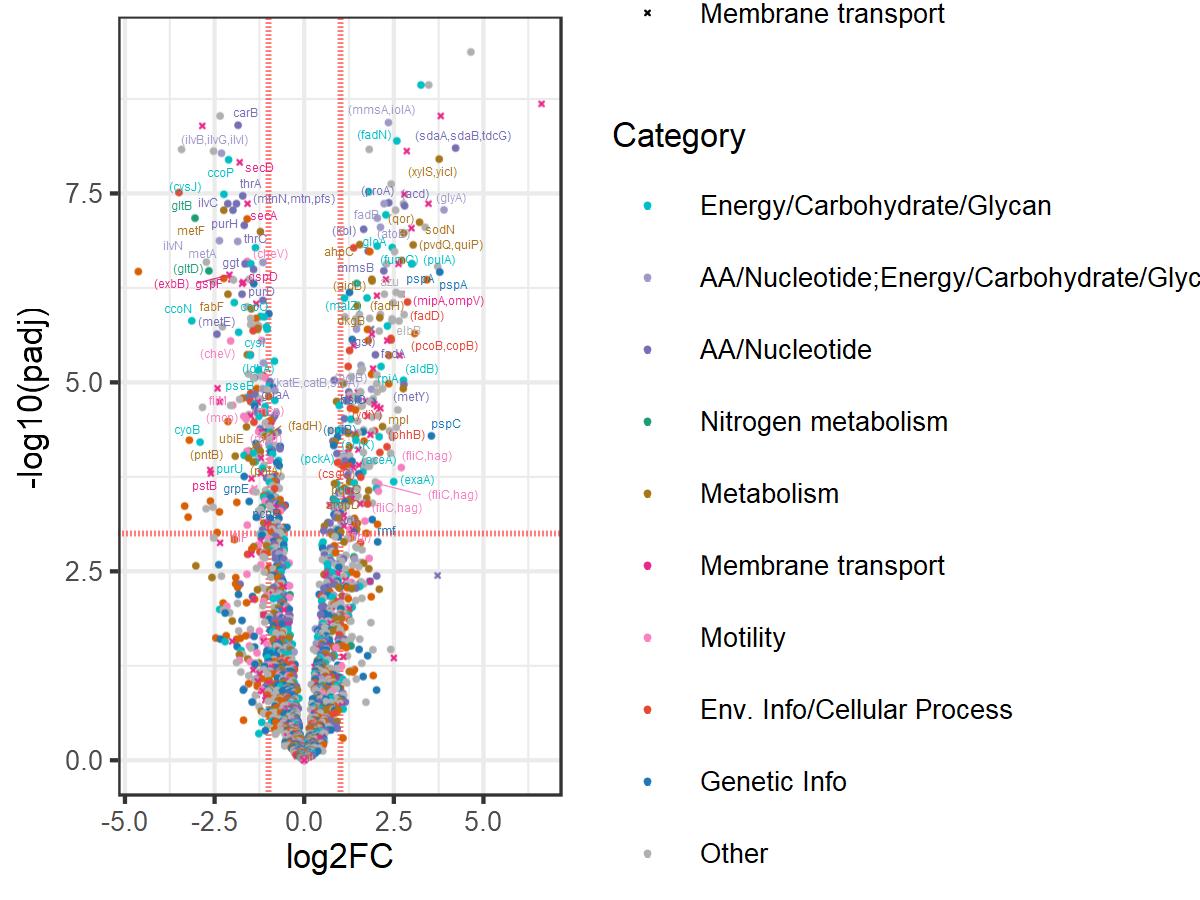

In [72]:
library(ggrepel)
assay = 'Proteome'

df_labels = df_all %>%
  filter(Assay == assay, abs(logFC) > 1.5, log.padj > 3, !is.na(gene), gene != '')

# Use ggplot2 allows more flexibility in plotting
df_all %>% filter(Assay == assay) %>%
ggplot(aes(x = logFC, y =log.padj, color=Category, fill=Category, shape=Membrane.transport 
          )) + 
    geom_vline(xintercept = c(-1,1), colour = "red", linetype="dotted" ) + # Add fold change cutoffs
    geom_hline(yintercept = 3, colour = "red", linetype="dotted" ) + # Add significance cutoffs
    ggrastr::geom_point_rast(size=0.3, stroke=0.3 )+
    theme_bw(base_size = 8) + # change theme
    #theme_bw() + # change theme
    xlab(expression("log2FC")) + # x-axis label
    ylab(expression(" -log10(padj)")) + # y-axis label
    #geom_vline(xintercept = 0, colour = "black") + # Add 0 lines
    scale_colour_manual(values = category.cols)+
    scale_fill_manual(values = category.cols)+
    scale_shape_manual(values = c(21,4)) +
    geom_text_repel(data=df_labels,
                   aes( logFC, log.padj ,label=gene), max.overlaps = Inf, size=1,
                    box.padding=0.05, segment.size=0.1
                   )  #+ # add gene label
    #facet_wrap(~contrast, ncol=2)

In [73]:
ggsave('figures/HOT1A3_longterm_DE_Proteome.svg', height = 3, width = 4)

Warning message:
"Removed 5 rows containing missing values (`geom_point()`)."


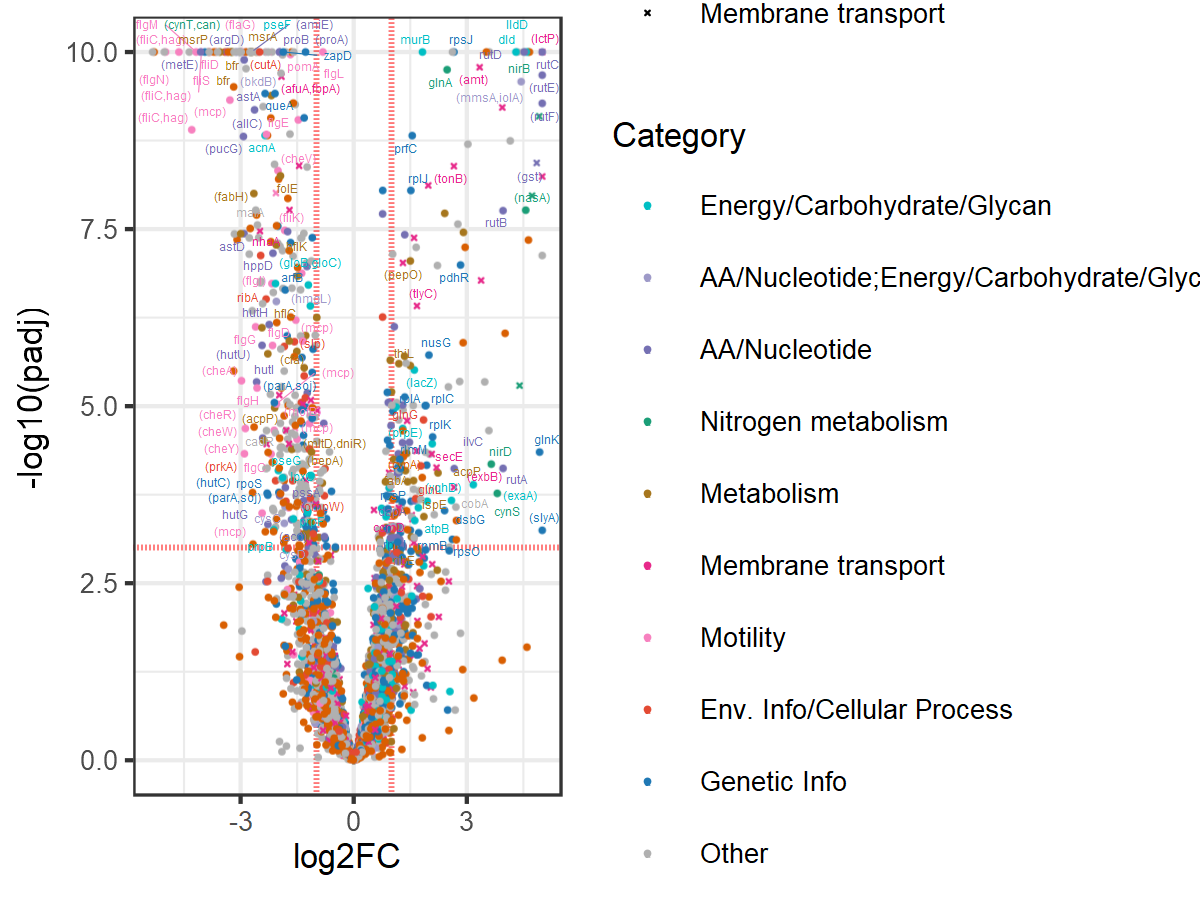

In [74]:
library(ggrepel)
assay = 'RNA'


ymax <- 10
df_all$capped.log.padj <- pmin(df_all$log.padj, ymax)
xmax <- 5
df_all$capped.logFC <- pmin(df_all$logFC, xmax)


df_labels = df_all %>%
  filter(Assay == assay, abs(logFC) > 1.5, log.padj > 3, !is.na(gene), gene != '')

# Use ggplot2 allows more flexibility in plotting
df_all %>% filter(Assay == assay) %>%
ggplot(aes(x = capped.logFC, y =capped.log.padj, color=Category, fill=Category, shape=Membrane.transport 
          )) + 
    geom_vline(xintercept = c(-1,1), colour = "red", linetype="dotted" ) + # Add fold change cutoffs
    geom_hline(yintercept = 3, colour = "red", linetype="dotted" ) + # Add significance cutoffs
    ggrastr::geom_point_rast(size=0.3, stroke=0.3 )+
    theme_bw(base_size = 8) + # change theme
    #theme_bw() + # change theme
    xlab(expression("log2FC")) + # x-axis label
    ylab(expression(" -log10(padj)")) + # y-axis label
    #geom_vline(xintercept = 0, colour = "black") + # Add 0 lines
    scale_colour_manual(values = category.cols)+
    scale_fill_manual(values = category.cols)+
    scale_shape_manual(values = c(21,4)) +
    geom_text_repel(data=df_labels,
                    aes( capped.logFC, capped.log.padj ,label=gene), max.overlaps = Inf, size=1,
                    box.padding=0.05, segment.size=0.1
                   )  #+ # add gene label
    #facet_wrap(~contrast, ncol=2)

In [75]:
ggsave('figures/HOT1A3_longterm_DE_RNA.svg', height = 3, width = 4)


Warning message:
"Removed 5 rows containing missing values (`geom_point()`)."


In [65]:
df_all$kegg_gene

Warning message:
"Unknown or uninitialised column: `kegg_gene`."


NULL

In [66]:
help(ggsave)

ggsave {ggplot2},R Documentation
filename,File name to create on disk.
plot,"Plot to save, defaults to last plot displayed."
device,"Device to use. Can either be a device function (e.g. png), or one of ""eps"", ""ps"", ""tex"" (pictex), ""pdf"", ""jpeg"", ""tiff"", ""png"", ""bmp"", ""svg"" or ""wmf"" (windows only)."
path,Path of the directory to save plot to: path and filename are combined to create the fully qualified file name. Defaults to the working directory.
scale,Multiplicative scaling factor.
"width, height, units","Plot size in units (""in"", ""cm"", ""mm"", or ""px""). If not supplied, uses the size of current graphics device."
dpi,"Plot resolution. Also accepts a string input: ""retina"" (320), ""print"" (300), or ""screen"" (72). Applies only to raster output types."
limitsize,"When TRUE (the default), ggsave() will not save images larger than 50x50 inches, to prevent the common error of specifying dimensions in pixels."
bg,"Background colour. If NULL, uses the plot.background fill value from the plot theme."
...,"Other arguments passed on to the graphics device function, as specified by device."
